In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from matrix import Matrix, print_table

%matplotlib inline

## Warm up

In [2]:
A = np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8)
B = np.array([[1,2,5],[3,12,4],[0,5,0]], dtype=np.uint8)

In [3]:
A @ B

array([[  7,  41,  13],
       [ 24, 125,  43],
       [ 15,  65,  20]], dtype=uint8)

In [4]:
(A == B).all()

False

In [5]:
np.random.randint(3, size=(3, 3), dtype=np.uint8)

array([[2, 2, 0],
       [0, 0, 2],
       [2, 1, 1]], dtype=uint8)

In [6]:
np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8).reshape(-1)

array([1, 2, 3, 3, 7, 7, 0, 5, 1], dtype=uint8)

In [7]:
hash(tuple(np.array([[1,2,3],[3,7,7],[0,5,1]], dtype=np.uint8).reshape(-1)))

-2518969009246642181

In [8]:
pow(3, 9)

19683

## Explore the vector space

In [9]:
def one_step(s):

    def mat_mul(i):
        return i[0] * i[1]

    products = itertools.product(s, s)
    new_s = map(mat_mul, products)
    return s.union(new_s)

A = Matrix(idx = 2)
B = Matrix(idx = 5)
C = Matrix(idx = 100)
result = one_step({A, B, C})

sorted(list(map(lambda x:x.idx(), result)))

[1, 2, 5, 7, 11, 14, 100]

In [10]:
def floodfill(s):
    last = s
    for i in range(100000):
        print(f'step #{i}, {len(last)}')
        new = one_step(last)
        if new == last or len(new) == pow(3, 9):
            last = new
            break
        last = new
    print(f'done, {len(last)}')
    return set(map(lambda x:x.idx(), last))

In [11]:
A = Matrix(idx = 2)
print(A)
B = Matrix(idx = 100)
print(B)
C = Matrix(idx = 1001)
print(C)
s = {A, B, C}

result = floodfill(s)
print(result)
print()
print_table(result)

[[2 0 0]
 [0 0 0]
 [0 0 0]]
[[1 0 2]
 [0 1 0]
 [0 0 0]]
[[2 0 0]
 [1 0 1]
 [1 0 0]]
step #0, 3
step #1, 9
step #2, 19
done, 19
{1, 2, 11, 271, 8335, 19, 532, 28, 13862, 14375, 1459, 308, 56, 731, 100, 8038, 1001, 1513, 758}

011000000001000000010000000010000000000000000000000000001000000000000000000000000
000000000000000000010000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000010000000000000000000000000000000000001000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000010000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000
0010000000000000000000000000010000000

## Accelerating for 64-core CPUs

In [12]:
from multiprocess import one_step_by_idx

def floodfill_by_idx(s):
    steps_table = dict()
    last = s
    for i in range(100000):
        print(f'step #{i}, {len(last)}')
        new = one_step_by_idx(last)
        
        # Mark steps
        for a in new:
            if a not in last:
                steps_table[a] = i
                
        if new == last or len(new) == pow(3, 9):
            last = new
            break
        last = new
    print(f'done, {len(last)}')
    return last, steps_table

In [13]:
s = {3, 100, 1000, 9999, 13452}
result, steps_table = floodfill_by_idx(s)
# print(result)
# print()
# print_table(result)

step #0, 5
step #1, 26
step #2, 227
step #3, 2037
step #4, 4925
step #5, 4929
done, 4929


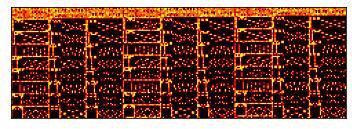

In [14]:
def visualize_floodfill_result(steps_table):
    num_rows = pow(3, 4)
    num_cols = pow(3, 9) // num_rows

    heatmap = np.empty(shape=(num_rows, num_cols))
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_rows + j
            heatmap[i][j] = steps_table.get(idx, 0)

    im = plt.imshow(heatmap, cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
visualize_floodfill_result(steps_table)

step #0, 2
step #1, 6
step #2, 26
step #3, 170
step #4, 447
step #5, 449
done, 449


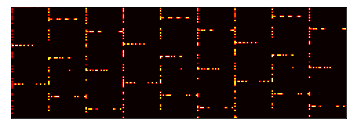

In [15]:
s = {999, 18888}
_, steps_table = floodfill_by_idx(s)
visualize_floodfill_result(steps_table)

step #0, 2
step #1, 6
step #2, 30
step #3, 312
step #4, 2427
step #5, 7814
step #6, 8464
done, 8464


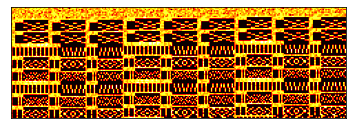

In [16]:
s = {123, 5000}
_, steps_table = floodfill_by_idx(s)
visualize_floodfill_result(steps_table)

## What is the index of Identity matrix?

In [17]:
I = Matrix(idx = 6643)
print(I)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [20]:
Matrix(idx = 123)

array([[0, 2, 1],
       [1, 1, 0],
       [0, 0, 0]], dtype=uint8)

In [21]:
Matrix(idx = 5307)

array([[0, 2, 1],
       [1, 2, 0],
       [1, 2, 0]], dtype=uint8)

In [26]:
r = Matrix(idx = 123) * Matrix(idx = 5307)
print(r, f'#{r.idx()}')

[[0 0 0]
 [1 1 1]
 [0 0 0]] #351
